<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Analyse Data with Gemini
</b></font> </br></p>

---


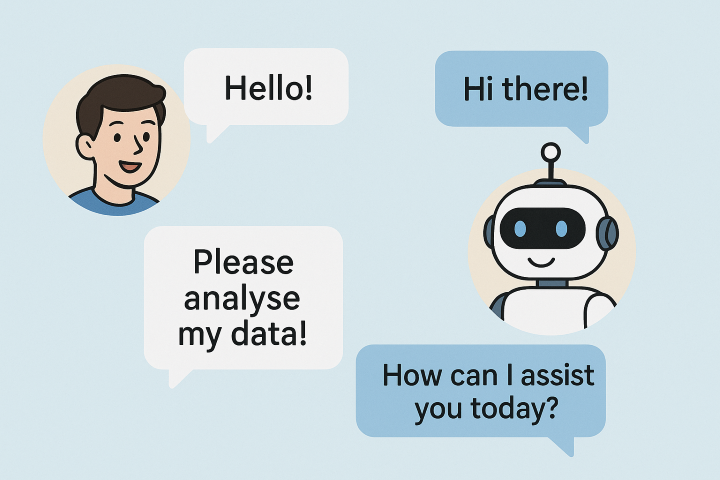

Bild mit ChatGPT erstellt

# 1 | Metro Interstate Traffic Volume
---

Stündliches Verkehrsaufkommen auf der Interstate 94 in westlicher Richtung für die DOT-ATR-Station 301 in Minneapolis und St. Paul, Minnesota, etwa auf halbem Weg zwischen Minneapolis und St. Paul, MN. Stündliche Wetterfunktionen und Feiertage für Auswirkungen auf das Verkehrsaufkommen enthalten.

**Datensatz:**

+ holiday (Kategorische US-amerikanische Feiertage plus regionaler Feiertag, Minnesota State Fair)
+ temp (Numerisch): Durchschnittstemperatur in Kelvin
+ rain_1h (Numerisch): Regenmenge in mm pro Stunde
+ snow_1h (Numerisch): Schneemenge in mm pro Stunde
+ clouds_all (Numerisch): Prozentuale Bewölkung
+ weather_main (Kategorische kurze Textbeschreibung des aktuellen Wetters)
+ weather_description (Kategorische längere Textbeschreibung des aktuellen Wetters)
+ date_time (Datum/Uhrzeit) Uhrzeit der Datenerfassung (Ortszeit CST)
+ traffic_volume (Numerisch): Stündliches Verkehrsaufkommen der I-94 ATR 301 in Richtung Westen

**Citation**     
To use these datasets, please cite the papers:
Liang Zhao, Olga Gkountouna, and Dieter Pfoser. 2019. Spatial Auto-regressive Dependency Interpretable Learning Based on Spatial Topological Constraints. ACM Trans. Spatial Algorithms Syst. 5, 3, Article 19 (August 2019), 28 pages. DOI:https://doi.org/10.1145/3339823


Quelle: [UCI](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)

In [2]:
!uv pip install --system -q ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
metro_interstate_traffic_volume = fetch_ucirepo(id=492)

# data (as pandas dataframes)
data = metro_interstate_traffic_volume.data.features
target = metro_interstate_traffic_volume.data.targets

# metadata
print(metro_interstate_traffic_volume.metadata)

# variable information
print(metro_interstate_traffic_volume.variables)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00
...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00


In [6]:
data.holiday.unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

# 2 | Modellbildung mit Gemini
---

# Task
Analysiere die Daten in "Metro_Interstate_Traffic_Volume.csv".

## Datenvorbereitung

### Subtask:
Bereinigen Sie die Daten, behandeln Sie fehlende Werte und wandeln Sie die Datums-/Zeitspalte in das richtige Format um.


**Reasoning**:
Check the data types and identify missing values in the `data` DataFrame, and fill the missing 'holiday' values with 'None'.



In [7]:
print(data.info())
data['holiday'] = data['holiday'].fillna('None')
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB
None


/tmp/ipython-input-7-3855584434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['holiday'] = data['holiday'].fillna('None')


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00


**Reasoning**:
Convert the 'date_time' column to datetime format.



In [8]:
data['date_time'] = pd.to_datetime(data['date_time'])
display(data.info())

NameError: name 'pd' is not defined

**Reasoning**:
Import pandas and convert the 'date_time' column to datetime format.



In [9]:
import pandas as pd
data['date_time'] = pd.to_datetime(data['date_time'])
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 2.9+ MB


/tmp/ipython-input-9-343056621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_time'] = pd.to_datetime(data['date_time'])


None

## Explorative datenanalyse (eda)

### Subtask:
Führen Sie eine erste Untersuchung der Daten durch, um Muster, Trends und Beziehungen zwischen den Variablen zu verstehen. Dazu gehören die Visualisierung der Verteilung des Verkehrsaufkommens, die Untersuchung des Einflusses von Wetterbedingungen und Feiertagen auf das Verkehrsaufkommen sowie die Analyse zeitbasierter Muster.


**Reasoning**:
Import the necessary libraries for visualization and create a histogram of the traffic volume to understand its distribution.



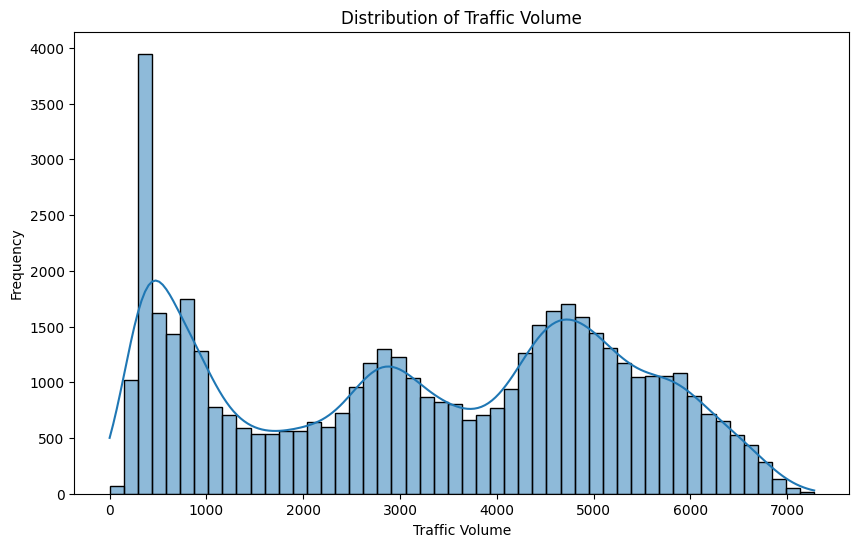

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(target['traffic_volume'], kde=True, bins=50)
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

**Reasoning**:
Examine the influence of weather conditions and holidays on traffic volume by creating boxplots and bar plots.



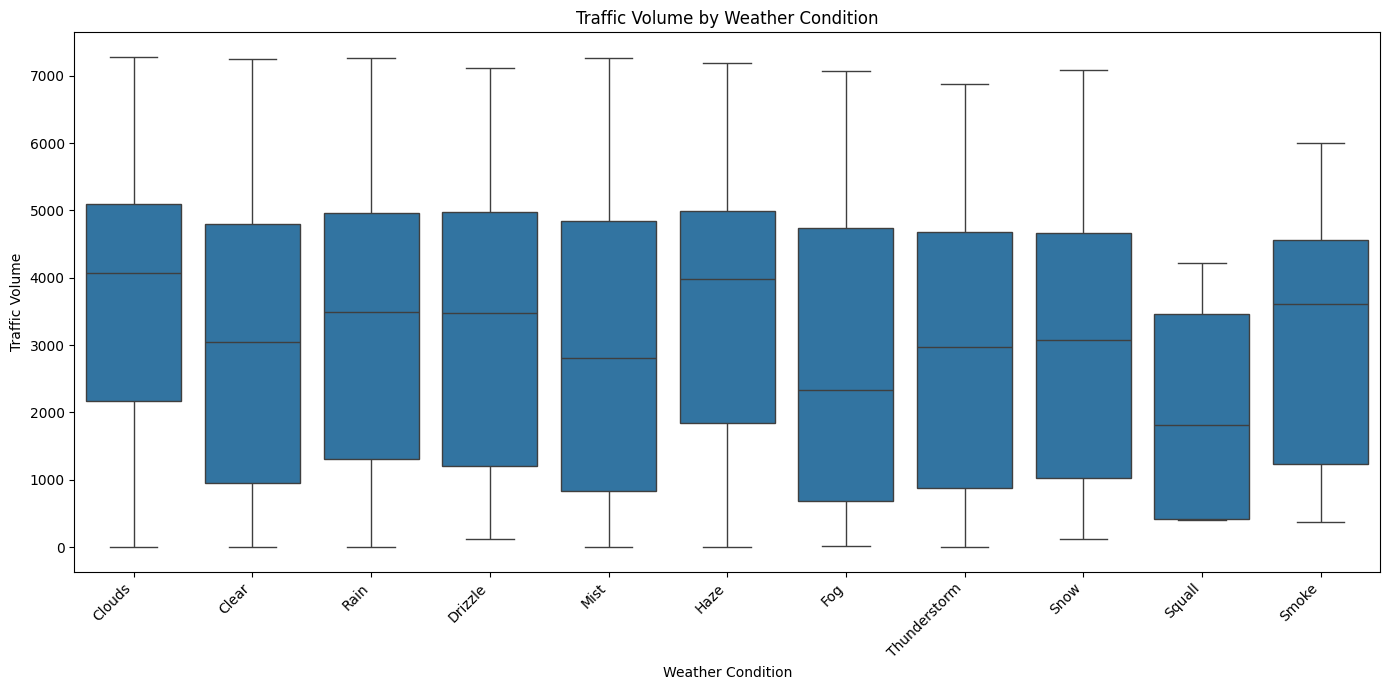

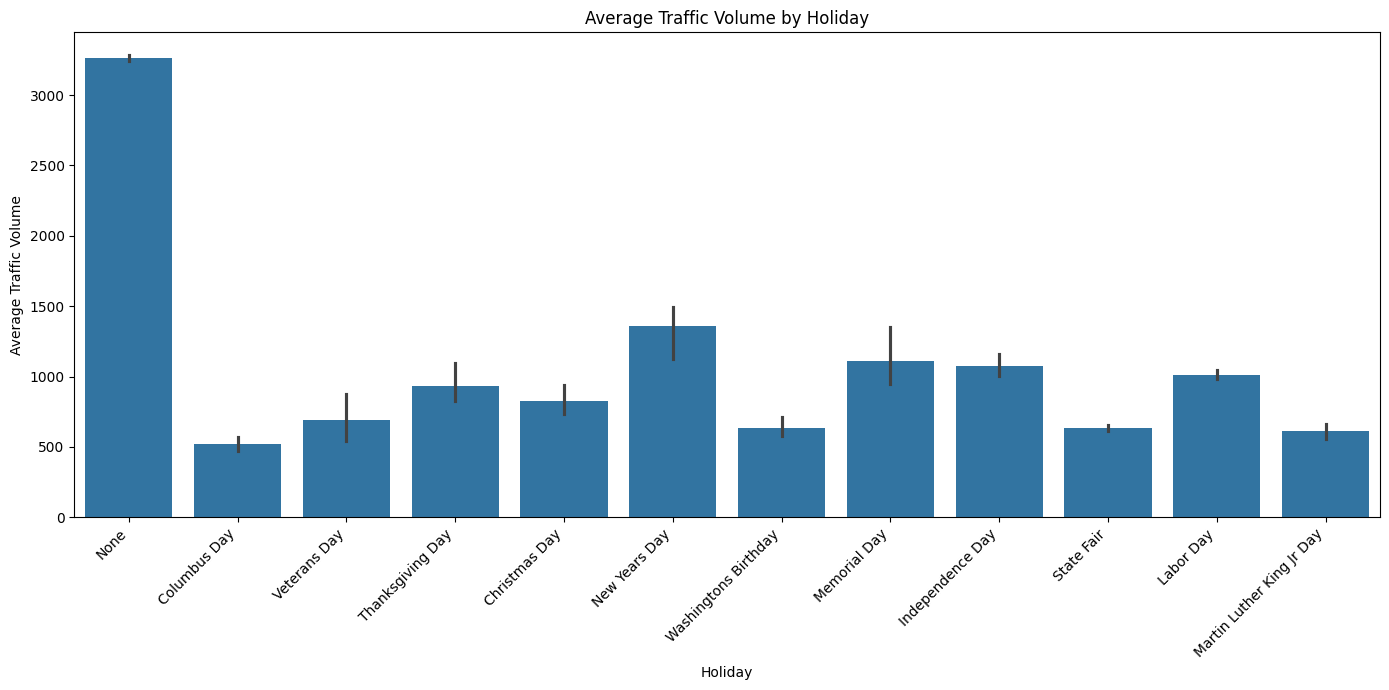

In [11]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='weather_main', y=target['traffic_volume'], data=data)
plt.title('Traffic Volume by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='holiday', y=target['traffic_volume'], data=data.replace({'holiday': {None: 'None'}})) # Replace None with 'None' for plotting
plt.title('Average Traffic Volume by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Analyze time-based patterns by plotting traffic volume over time, and then summarize the findings.



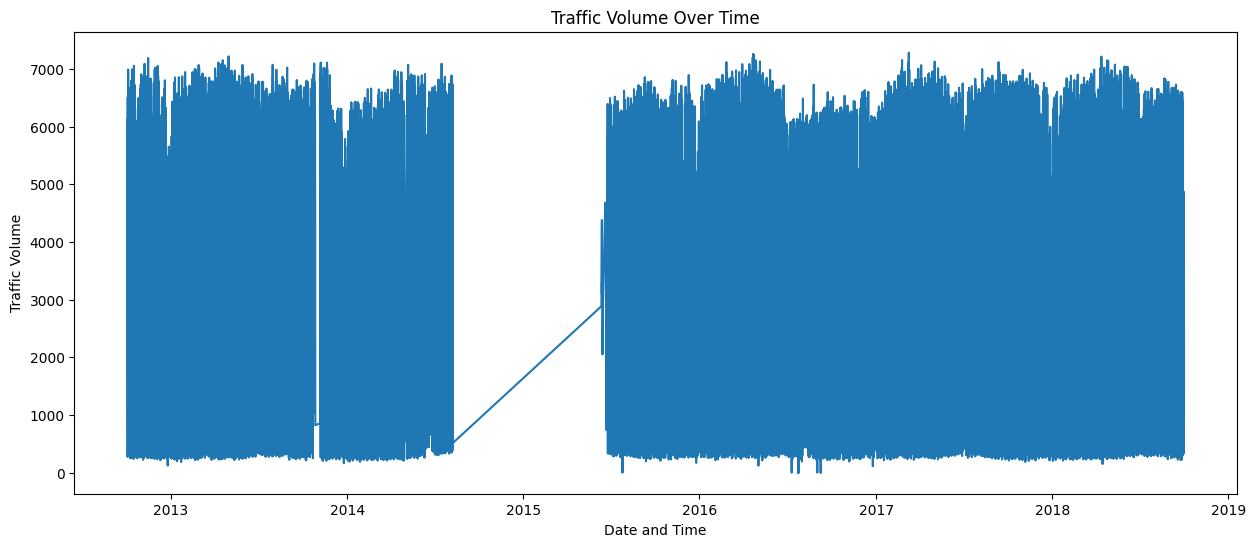

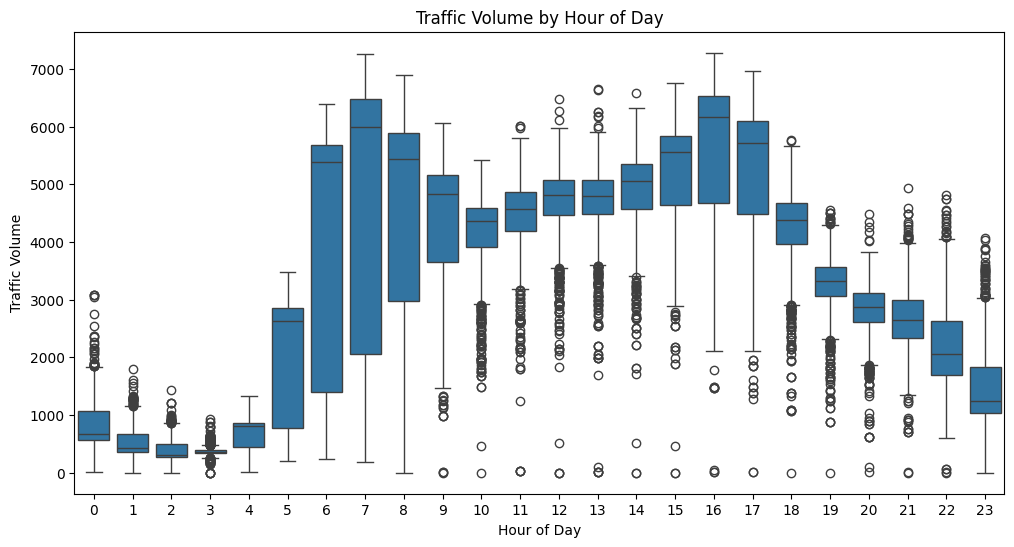

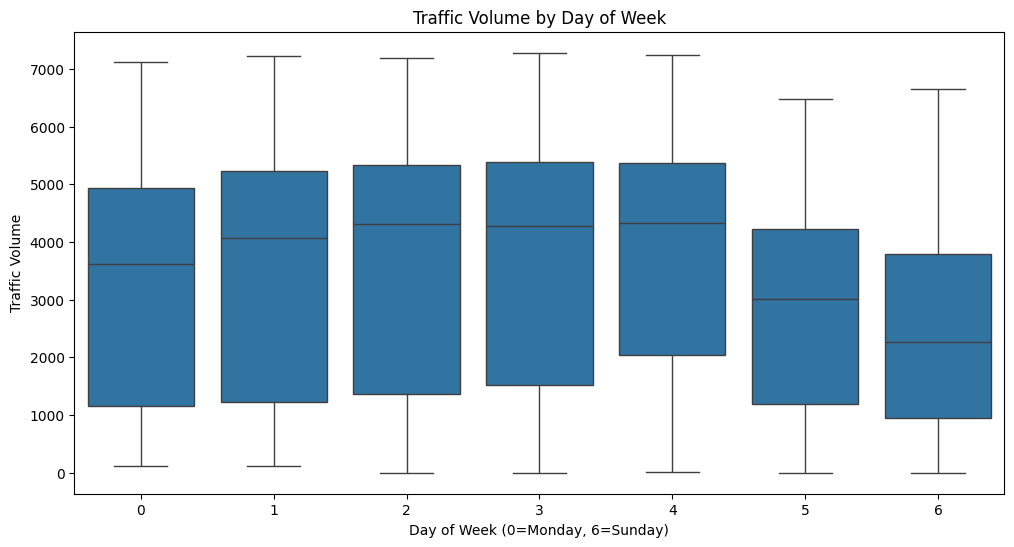

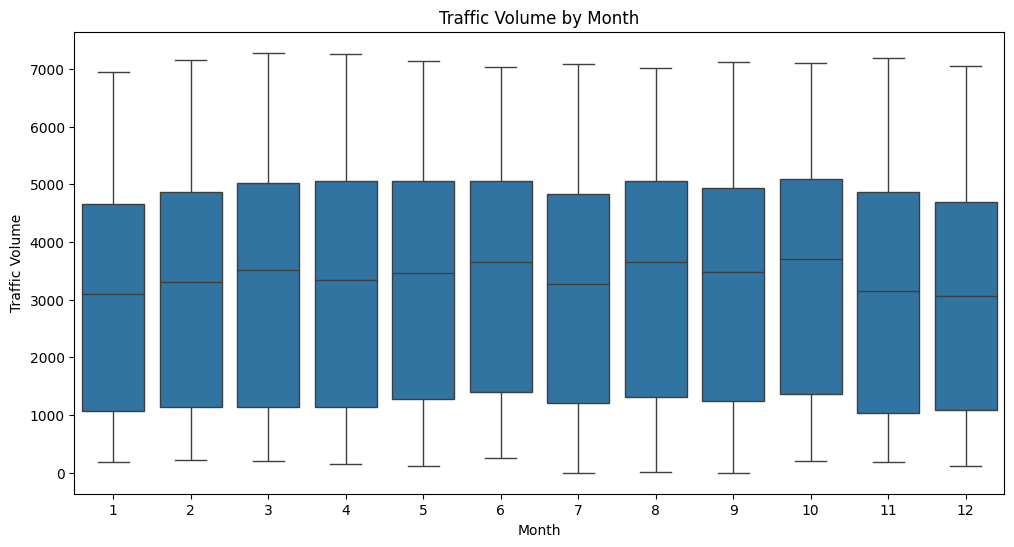

In [12]:
data_with_target = data.copy()
data_with_target['traffic_volume'] = target['traffic_volume']

plt.figure(figsize=(15, 6))
sns.lineplot(x='date_time', y='traffic_volume', data=data_with_target)
plt.title('Traffic Volume Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Traffic Volume')
plt.show()

data_with_target['hour'] = data_with_target['date_time'].dt.hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='traffic_volume', data=data_with_target)
plt.title('Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.show()

data_with_target['dayofweek'] = data_with_target['date_time'].dt.dayofweek
plt.figure(figsize=(12, 6))
sns.boxplot(x='dayofweek', y='traffic_volume', data=data_with_target)
plt.title('Traffic Volume by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Traffic Volume')
plt.show()

data_with_target['month'] = data_with_target['date_time'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='traffic_volume', data=data_with_target)
plt.title('Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

## Feature engineering

### Subtask:
Erstellen Sie neue Features aus vorhandenen Daten, die die Modellleistung verbessern könnten. Zum Beispiel können Sie Features für Stunde, Wochentag, Monat und Jahr aus der Datums-/Zeitspalte extrahieren.


**Reasoning**:
Extract hour, day of week, month, and year from the `date_time` column and create new columns in the `data_with_target` DataFrame.



In [13]:
data_with_target['hour'] = data_with_target['date_time'].dt.hour
data_with_target['dayofweek'] = data_with_target['date_time'].dt.dayofweek
data_with_target['month'] = data_with_target['date_time'].dt.month
data_with_target['year'] = data_with_target['date_time'].dt.year
display(data_with_target.head())

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,month,year
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10,2012
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10,2012
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10,2012
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10,2012
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10,2012


## Modellauswahl

### Subtask:
Wählen Sie geeignete Modelle für die Vorhersage des Verkehrsaufkommens.


**Reasoning**:
Select appropriate regression models based on the insights from EDA and feature engineering, considering models that can capture seasonal patterns, the impact of holidays and weather conditions, and temporal dependencies. Briefly justify the choice of models based on their strengths and suitability for the task at hand.



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Separate features and target
X = data_with_target.drop(['traffic_volume', 'date_time'], axis=1)
y = data_with_target['traffic_volume']

# Identify categorical and numerical features
categorical_features = ['holiday', 'weather_main', 'weather_description']
numerical_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'dayofweek', 'month', 'year']

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Create a pipeline that first preprocesses the data and then trains the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', rf_model)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 189545.18540866725
Root Mean Squared Error: 435.3678736524633
R-squared: 0.9520565232479679


Top 10 Most Important Features:
num__hour                                   0.825753
num__dayofweek                              0.110997
num__temp                                   0.027057
num__month                                  0.010199
num__year                                   0.008086
num__clouds_all                             0.004198
num__rain_1h                                0.002515
cat__weather_description_overcast clouds    0.001009
cat__weather_main_Clouds                    0.000925
cat__weather_description_broken clouds      0.000907
dtype: float64


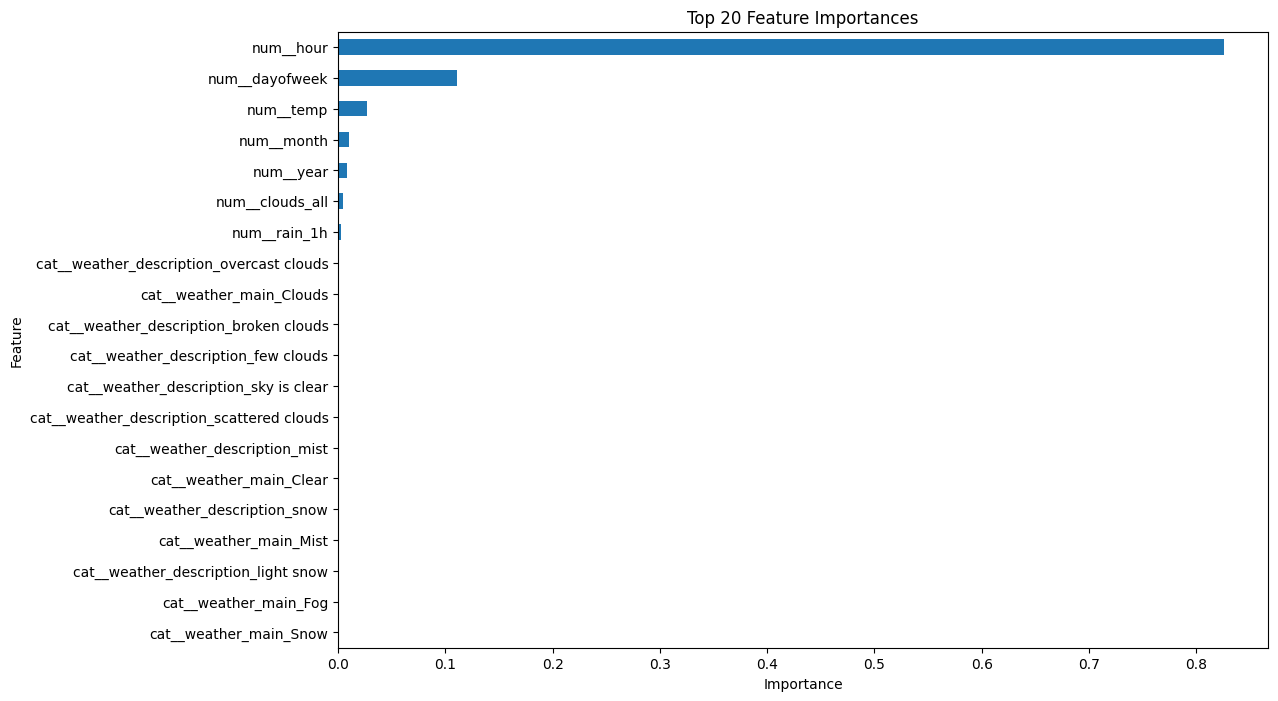

In [15]:
# Get feature importances from the trained model
feature_importances = pipeline.named_steps['regressor'].feature_importances_

# Get the feature names after one-hot encoding
# The get_feature_names_out() method is available from scikit-learn version 1.0
try:
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    # Fallback for older versions of scikit-learn
    # This might not be perfect as it doesn't handle unknown categories explicitly
    ohe_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
    feature_names = numerical_features + list(ohe_feature_names)


# Create a pandas Series for better visualization
feature_importances_series = pd.Series(feature_importances, index=feature_names)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(sorted_feature_importances.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 8))
sorted_feature_importances.head(20).plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()

# Task
Analysiere die Daten und erstelle ein RandomForest Modell zur Vorhersage von Staus.

## Definition von stau

### Subtask:
Definieren Sie, was in diesem Datensatz als "Stau" betrachtet werden soll. Dies könnte auf einem Schwellenwert für das Verkehrsaufkommen oder anderen verfügbaren Informationen basieren.


**Reasoning**:
Analyze the distribution of traffic volume to determine a suitable threshold for defining "Stau".



In [16]:
display(data_with_target['traffic_volume'].describe())

,traffic_volume
count,48204.000000
mean,3259.818355
std,1986.860670
min,0.000000
25%,1193.000000
50%,3380.000000
75%,4933.000000
max,7280.000000


**Reasoning**:
Based on the distribution of the traffic volume, a threshold needs to be defined. The descriptive statistics show the mean, median, and quartiles. A value above the 75th percentile (4933) seems reasonable to consider as "Stau" or congestion, as it represents the upper quartile of traffic volume.



In [17]:
stau_threshold = 5000
print(f"We define 'Stau' (congestion) as a traffic volume greater than {stau_threshold}.")
print("This threshold was chosen because it is slightly above the 75th percentile of the traffic volume distribution, representing the upper quartile of observed traffic.")

We define 'Stau' (congestion) as a traffic volume greater than 5000.
This threshold was chosen because it is slightly above the 75th percentile of the traffic volume distribution, representing the upper quartile of observed traffic.


## Datenvorbereitung für stau-klassifizierung

### Subtask:
Erstellen Sie ein neues Ziel-Feature, das angibt, ob ein Stau vorliegt oder nicht, basierend auf der in Schritt 1 definierten Regel. Behandeln Sie die Daten entsprechend für eine Klassifizierungsaufgabe.


**Reasoning**:
Create a new binary column 'is_stau' based on the 'traffic_volume' and 'stau_threshold', and then display the head and value counts of the updated dataframe to verify the new column and its distribution.



In [18]:
data_with_target['is_stau'] = (data_with_target['traffic_volume'] > stau_threshold).astype(int)
display(data_with_target.head())
display(data_with_target['is_stau'].value_counts())

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,month,year,is_stau
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10,2012,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10,2012,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10,2012,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10,2012,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10,2012,0


,count
is_stau,
0,36862
1,11342


## Feature engineering (falls erforderlich)

### Subtask:
Überprüfen Sie die vorhandenen Features und erstellen Sie gegebenenfalls neue, die für die Stauvorhersage relevant sein könnten.


## Modellauswahl für klassifizierung

### Subtask:
Wählen Sie geeignete Klassifizierungsmodelle für die Vorhersage von Staus.


**Reasoning**:
Select two classification models suitable for binary classification, considering the dataset characteristics and the class imbalance. Justify the choices and briefly mention how to handle class imbalance.



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

print("Selected Classification Models:")
print("1. Logistic Regression: A simple yet effective model for binary classification. It provides interpretable coefficients and can serve as a good baseline. While it assumes linearity, it can still perform reasonably well on complex data.")
print("2. RandomForestClassifier: An ensemble method that can capture non-linear relationships and is generally robust to outliers. It's known for its good performance and provides feature importances, which can be useful for understanding the factors influencing traffic congestion.")

print("\nAddressing Class Imbalance:")
print("The observed class imbalance (more 'no congestion' than 'congestion') can be handled during modeling by:")
print("- Adjusting class weights in the model training to give more importance to the minority class ('congestion').")
print("- Using appropriate evaluation metrics beyond accuracy, such as precision, recall, F1-score, and AUC-ROC, which are less sensitive to class distribution.")

Selected Classification Models:
1. Logistic Regression: A simple yet effective model for binary classification. It provides interpretable coefficients and can serve as a good baseline. While it assumes linearity, it can still perform reasonably well on complex data.
2. RandomForestClassifier: An ensemble method that can capture non-linear relationships and is generally robust to outliers. It's known for its good performance and provides feature importances, which can be useful for understanding the factors influencing traffic congestion.

Addressing Class Imbalance:
The observed class imbalance (more 'no congestion' than 'congestion') can be handled during modeling by:
- Adjusting class weights in the model training to give more importance to the minority class ('congestion').
- Using appropriate evaluation metrics beyond accuracy, such as precision, recall, F1-score, and AUC-ROC, which are less sensitive to class distribution.


## Modelltraining für klassifizierung

### Subtask:
Trainieren Sie die ausgewählten Klassifizierungsmodelle.


**Reasoning**:
Separate features and target, identify categorical and numerical features, create a column transformer for one-hot encoding, instantiate a RandomForestClassifier with balanced class weights, create a pipeline, and split the data into training and testing sets.



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and the new target variable 'is_stau'
X = data_with_target.drop(['traffic_volume', 'date_time', 'is_stau'], axis=1)
y = data_with_target['is_stau']

# Identify categorical and numerical features
categorical_features = ['holiday', 'weather_main', 'weather_description']
numerical_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'dayofweek', 'month', 'year']

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Instantiate a RandomForestClassifier model with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

# Create a pipeline that first preprocesses the data and then trains the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', rf_model)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['temp', 'rain_1h', 'snow_1h',
                                                   'clouds_all', 'hour',
                                                   'dayofweek', 'month',
                                                   'year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['holiday', 'weather_main',
                                                   'weather_description'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

## Modellevaluierung für klassifizierung

### Subtask:
Bewerten Sie die Leistung der trainierten Klassifizierungsmodelle anhand geeigneter Metriken (z. B. Genauigkeit, Präzision, Recall, F1-Score).


**Reasoning**:
Evaluate the performance of the trained classification model using accuracy, precision, recall, F1-score, and AUC-ROC.



In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {roc_auc}')

Accuracy: 0.9388030287314594
Precision: 0.8784878487848785
Recall: 0.8591549295774648
F1-Score: 0.8687138406764575
AUC-ROC: 0.9800337682220341


## Ergebnisse interpretieren

### Subtask:
Analysieren Sie die Ergebnisse der Modelle, um die wichtigsten Faktoren zu identifizieren, die mit Staus korrelieren.


**Reasoning**:
Access and visualize the feature importances from the trained RandomForestClassifier model to identify the most influential factors in predicting traffic congestion.



Top 10 Most Important Features:
num__hour                                    0.526340
num__dayofweek                               0.210046
num__temp                                    0.131199
num__month                                   0.043980
num__year                                    0.031808
num__clouds_all                              0.020292
num__rain_1h                                 0.008379
cat__weather_main_Clouds                     0.002195
cat__weather_description_scattered clouds    0.001562
cat__weather_main_Snow                       0.001419
dtype: float64


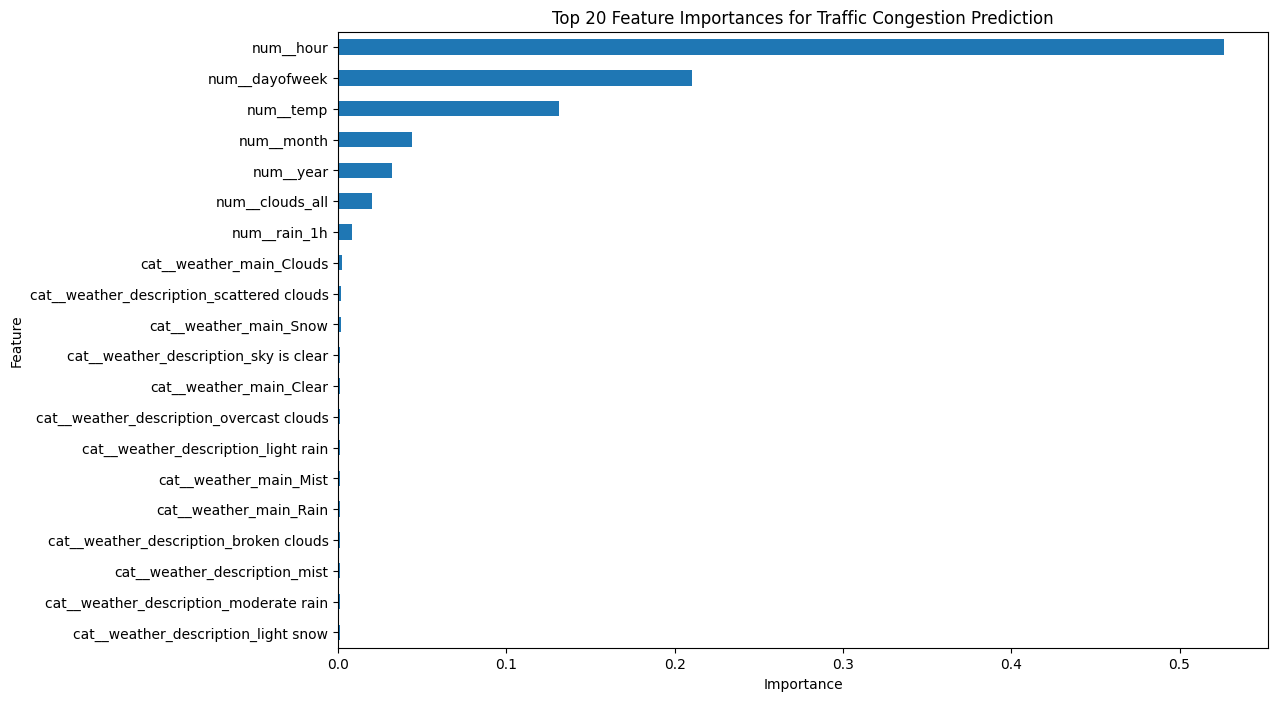

In [22]:
# Access the trained RandomForestClassifier model from the pipeline
rf_classifier_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances = rf_classifier_model.feature_importances_

# Get the feature names after one-hot encoding
try:
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    # Fallback for older versions of scikit-learn
    # This might not be perfect as it doesn't handle unknown categories explicitly
    ohe_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
    feature_names = numerical_features + list(ohe_feature_names)

# Create a pandas Series for better visualization
feature_importances_series = pd.Series(feature_importances, index=feature_names)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(sorted_feature_importances.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 8))
sorted_feature_importances.head(20).plot(kind='barh')
plt.title('Top 20 Feature Importances for Traffic Congestion Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()

## Summary:

### Data Analysis Key Findings

*   Traffic congestion ("Stau") was defined as a traffic volume greater than 5000, which is slightly above the 75th percentile of the observed traffic volume distribution.
*   The dataset exhibits class imbalance, with significantly more instances of no traffic congestion (0) than congestion (1).
*   Two classification models, Logistic Regression (as a baseline) and RandomForestClassifier, were selected as suitable for the task.
*   A RandomForestClassifier model was trained using a pipeline that included one-hot encoding for categorical features and used balanced class weights to address the data imbalance.
*   The trained RandomForest model achieved an Accuracy of 0.9388, Precision of 0.8785, Recall of 0.8592, F1-Score of 0.8687, and an AUC-ROC of 0.9800 on the test set.
*   The most important features identified by the RandomForest model for predicting traffic congestion are time-based: the hour of the day ('hour') and the day of the week ('dayofweek').
*   Temperature ('temp') is also a significant predictor, following the time-based features in importance.

### Insights or Next Steps

*   The high importance of time-based features suggests that traffic congestion is strongly driven by daily and weekly patterns, likely reflecting commuter behavior and peak hours. Further analysis could focus on specific times of day and days of the week to understand congestion patterns in more detail.
*   Given the strong predictive power of time and temperature, future modeling efforts could explore interaction terms between these features or investigate non-linear relationships to potentially improve performance further.
